In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def clean_1():
    df = pd.read_csv("homicides_data.csv")
    df = df.drop(['StateName', 'Subcircum', 'FileDate'], axis =1)
    df = df.drop_duplicates()
    df = df[df.ActionType != "Adjustment"]
    df.drop("ActionType", axis=1, inplace = True)
    df.reset_index(inplace = True)
    df_clean = df[['State','Solved', 'Year']]
    return df_clean
df_clean = clean_1()

In [3]:
def create_decade():
    df_clean['Decade'] = df_clean['Year']
    df_clean['Decade'] = df_clean['Decade'].apply(lambda x: str(x))
    df_clean['Decade'] = df_clean['Decade'].str[:3]
    df_clean['Zeros'] = '0'
    df_clean['Decade'] = df_clean['Decade'] + df_clean['Zeros']
    df_clean.drop('Zeros', axis= 1, inplace=True)
    df_clean.drop('Year', axis= 1, inplace=True)
    return df_clean
df_clean = create_decade()

In [4]:
def enc_solved():
    df_clean['Enc_Solved'] = df_clean['Solved']
    coding = df_clean['Enc_Solved']
    df_clean[['Enc_NoSolved', 'Enc_Solved']] = pd.get_dummies(coding)
    return df_clean
def sum_solved():
    agrupado = df_clean.groupby(['Decade', 'State']).sum()
    return agrupado
enc_solved()
agrupado = sum_solved()

In [5]:
def clean_population():
    population = pd.read_csv('population.csv', sep=";")
    population.rename(columns={'Unnamed: 0':'Area'},inplace=True)
    population.set_index('Area', inplace = True)
    population.drop(population.filter(regex='Rank').columns, axis=1, inplace = True)
    population.drop(population.filter(regex='2020').columns, axis=1, inplace = True)
    population = population.T
    population = population.iloc[::-1]
    population['Decade'] = [1970,1970,1980,1980,1990,1990,2000,2000,2010,2010]
    col_name="Decade"
    first_col = population.pop("Decade")
    population.insert(0, col_name, first_col)
    population.reset_index(level= None, inplace=True)
    population.set_index('Decade', inplace = True)
    population.rename(columns = {'index': 'Medidas'}, inplace=True)
    population['Medidas'] = population['Medidas'].str[:-12]
    population.reset_index(level='Decade', inplace=True)
    return population

In [6]:
population = clean_population()

In [7]:
population2 = population.groupby(['Decade', 'Medidas']).sum()
population3 = population2.stack().unstack("Medidas").reset_index().rename(columns={'Area':'State'})
print(population3)

Medidas  Decade           State Population Density Resident Population
0          1970         Alabama               68,0           3.444.165
1          1970          Alaska                0,5             300.382
2          1970         Arizona               15,6           1.770.900
3          1970        Arkansas               37,0           1.923.295
4          1970      California              128,1          19.953.134
..          ...             ...                ...                 ...
255        2010      Washington              101,2           6.724.540
256        2010   West Virginia               77,1           1.852.994
257        2010       Wisconsin              105,0           5.686.986
258        2010         Wyoming                5,8             563.626
259        2010  United States1               87,4         308.745.538

[260 rows x 4 columns]


In [8]:
def arreglos():
    population2 = population.groupby(['Decade', 'Medidas']).sum()
    population3 = population2.stack().unstack("Medidas").reset_index().rename(columns={'Area':'State'})
    return population3
population3 = arreglos()

In [9]:
population3

Medidas,Decade,State,Population Density,Resident Population
0,1970,Alabama,"68,0",3.444.165
1,1970,Alaska,"0,5",300.382
2,1970,Arizona,"15,6",1.770.900
3,1970,Arkansas,"37,0",1.923.295
4,1970,California,"128,1",19.953.134
...,...,...,...,...
255,2010,Washington,"101,2",6.724.540
256,2010,West Virginia,"77,1",1.852.994
257,2010,Wisconsin,"105,0",5.686.986
258,2010,Wyoming,"5,8",563.626


In [10]:
population3.rename(columns={"Area": "State"})

Medidas,Decade,State,Population Density,Resident Population
0,1970,Alabama,"68,0",3.444.165
1,1970,Alaska,"0,5",300.382
2,1970,Arizona,"15,6",1.770.900
3,1970,Arkansas,"37,0",1.923.295
4,1970,California,"128,1",19.953.134
...,...,...,...,...
255,2010,Washington,"101,2",6.724.540
256,2010,West Virginia,"77,1",1.852.994
257,2010,Wisconsin,"105,0",5.686.986
258,2010,Wyoming,"5,8",563.626


In [11]:
def converger():
    df = agrupado.reset_index()
    df['Decade']=df['Decade'].astype('int64')
    completo = df.merge(population3, on = ['Decade', 'State'])
    return completo 
completo = converger()
completo

,Decade,State,Enc_Solved,Enc_NoSolved,Population Density,Resident Population
0,1970,Alabama,1721.0,171.0,"68,0",3.444.165
1,1970,Alaska,134.0,43.0,"0,5",300.382
2,1970,Arizona,605.0,192.0,"15,6",1.770.900
3,1970,Arkansas,668.0,45.0,"37,0",1.923.295
4,1970,California,5184.0,2648.0,"128,1",19.953.134
...,...,...,...,...,...,...
245,2010,Virginia,3246.0,797.0,"202,6",8.001.024
246,2010,Washington,1719.0,340.0,"101,2",6.724.540
247,2010,West Virginia,653.0,100.0,"77,1",1.852.994
248,2010,Wisconsin,1696.0,297.0,"105,0",5.686.986


In [12]:
def operables(completo):
    completo['Population Density']=completo['Population Density'].apply(lambda x: x.replace('.',"").replace(',',"."))
    completo['Resident Population']=completo['Resident Population'].apply(lambda x: x.replace('.',""))
    completo['Population Density']=completo['Population Density'].astype('float')
    completo['Resident Population']=completo['Resident Population'].astype('int64')
    completo = completo[completo['Decade'] != 1970]
    return completo
completo = operables(completo)


In [14]:
completo.to_csv('homi_final.csv', index =False)

In [16]:
completo.to_json('homi_finaljson.json')

In [30]:
caca = pd.read_csv('homi_final.csv')
caca

,Decade,State,Enc_Solved,Enc_NoSolved,Population Density,Resident Population
0,1970,Alabama,1721.0,171.0,68.0,3444165
1,1970,Alaska,134.0,43.0,0.5,300382
2,1970,Arizona,605.0,192.0,15.6,1770900
3,1970,Arkansas,668.0,45.0,37.0,1923295
4,1970,California,5184.0,2648.0,128.1,19953134
...,...,...,...,...,...,...
245,2010,Virginia,3246.0,797.0,202.6,8001024
246,2010,Washington,1719.0,340.0,101.2,6724540
247,2010,West Virginia,653.0,100.0,77.1,1852994
248,2010,Wisconsin,1696.0,297.0,105.0,5686986


<AxesSubplot:>

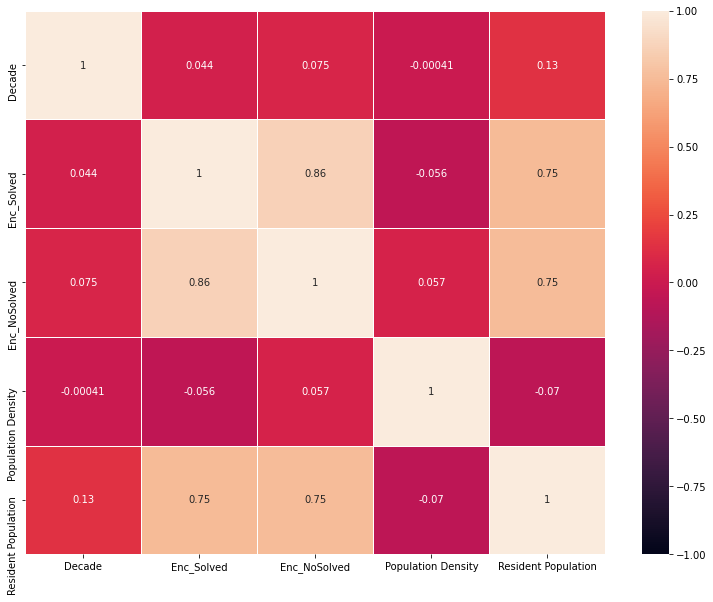

In [13]:
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(completo.corr(),
           vmin = -1,
           vmax = 1,
            annot = True,
           linewidths = .5)

Text(0.5, 0, 'decade')

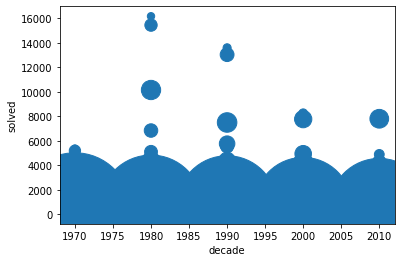

In [23]:
plt.scatter(completo.Decade, completo.Enc_Solved, s=completo['Population Density'])
plt.ylabel('solved')
plt.xlabel('decade')

C:\Users\marin\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


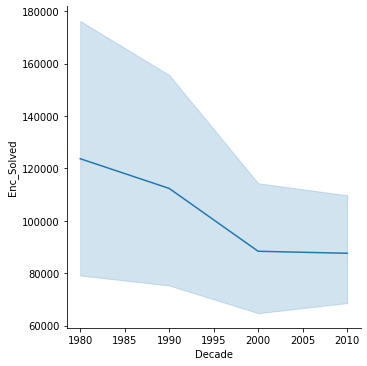

In [24]:
sns.relplot('Decade', 'Enc_Solved', data = completo, kind ='line',estimator =sum)

C:\Users\marin\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


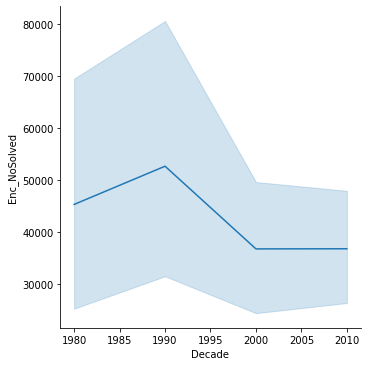

In [32]:
sns.relplot('Decade', 'Enc_NoSolved', data = completo, kind ='line',estimator=sum)

In [28]:
sns.relplot('Decade', 'Enc_Solved', data = completo, kind ='line',hue='Alaska, California, Colorado, Hawái, Idaho, Montana, Nevada, Oregón, Utah, Washington Wyoming', estimator =sum)

TypeError: unsupported operand type(s) for |: 'str' and 'str'

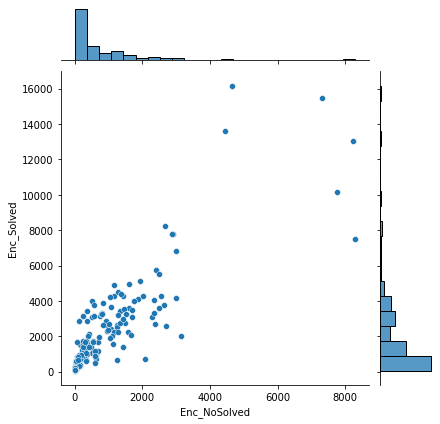

In [36]:
sns.jointplot(x ="Enc_NoSolved", y ="Enc_Solved", data = completo)